In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
# Import data

dt = pd.read_excel (r'F:\Program\OneDrive\KHOÁ LUẬN 2020\Exactly_Data.xlsx')
dt.columns
dt.shape

Index(['STD', 'Unnamed: 1', 'Unnamed: 2', 'WAL', 'Unnamed: 4', 'Unnamed: 5',
       'JUM', 'Unnamed: 7', 'Unnamed: 8', 'JOG', 'Unnamed: 10', 'Unnamed: 11',
       'STU', 'Unnamed: 13', 'Unnamed: 14', 'STN', 'Unnamed: 16',
       'Unnamed: 17', 'FKL', 'Unnamed: 19', 'Unnamed: 20', 'FOL',
       'Unnamed: 22', 'Unnamed: 23', 'SDL', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

(28939, 27)

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

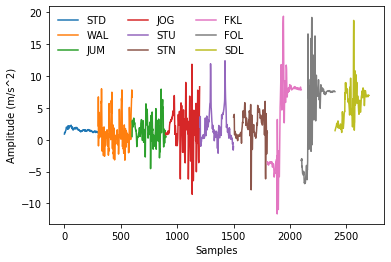

In [3]:
# Plot orginal signal at the same time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal

ans = 0
Standing = dt[['STD','Unnamed: 1', 'Unnamed: 2' ]]
Walking_normal = dt[['WAL', 'Unnamed: 4', 'Unnamed: 5']]
Jumping = dt[['JUM', 'Unnamed: 7', 'Unnamed: 8']] 
Jogging = dt[['JOG', 'Unnamed: 10', 'Unnamed: 11']]
Stairs_up = dt[['STU', 'Unnamed: 13', 'Unnamed: 14']] 
Stairs_down = dt[['STN', 'Unnamed: 16', 'Unnamed: 17']] 
Fall_front_knees_lying = dt[['FKL', 'Unnamed: 19', 'Unnamed: 20']]
Fall_forward_lying = dt[['FOL', 'Unnamed: 22', 'Unnamed: 23']] 
Sideward_lying = dt[['SDL', 'Unnamed: 25', 'Unnamed: 26']] 


lst = [Standing, Walking_normal,Jumping,Jogging,Stairs_up,Stairs_down, Fall_front_knees_lying, Fall_forward_lying, Sideward_lying]
x_label_samples = []

# Number of samples displayed per behavior
number_samples = 300
slot = 0
for act in lst:
    slot += 1
    arr_slot = [i for i in  range((slot-1)*number_samples, slot*number_samples)]
    x_label_samples.clear()
    x_label_samples.extend(arr_slot)
    for value in act:
        walk = dt[value]
        walk = walk.dropna()
        walk = walk.drop(0)
        walk.index = pd.RangeIndex(len(walk.index))

        x = walk[0:number_samples]

    plt.plot(x_label_samples, x)
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (m/s^2)")
    plt.legend(["STD","WAL","JUM","JOG","STU","STN","FKL", "FOL", "SDL"], frameon=False, ncol = 3)

 plt.savefig(): lưu hình về máy

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 1.0, 'Using avarage filter')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(1.0, 1.0, 'Using mean')

C:\Users\dell\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 1.0, 'Using avarage filter')

C:\Users\dell\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(1.0, 1.0, 'Using mean')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 1.0, 'Using avarage filter')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(1.0, 1.0, 'Using mean')

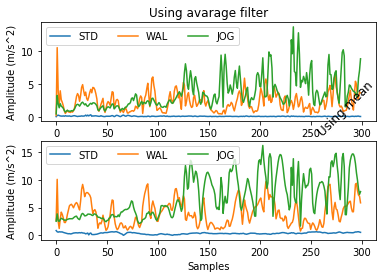

In [4]:
# Plot 9 behaviors at the same time
# acc = sqrt(ax^2 + ay^2 + az^2)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal

ans = 0
ans1 = 0
Standing = dt[['STD','Unnamed: 1', 'Unnamed: 2' ]]
Walking_normal = dt[['WAL', 'Unnamed: 4', 'Unnamed: 5']]
Jumping = dt[['JUM', 'Unnamed: 7', 'Unnamed: 8']] 
Jogging = dt[['JOG', 'Unnamed: 10', 'Unnamed: 11']]
Stairs_up = dt[['STU', 'Unnamed: 13', 'Unnamed: 14']] 
Stairs_down = dt[['STN', 'Unnamed: 16', 'Unnamed: 17']] 
Fall_front_knees_lying = dt[['FKL', 'Unnamed: 19', 'Unnamed: 20']]
Fall_forward_lying = dt[['FOL', 'Unnamed: 22', 'Unnamed: 23']] 
Sideward_lying = dt[['SDL', 'Unnamed: 25', 'Unnamed: 26']] 

number_samples = 300
lst = [Standing, Walking_normal,Jogging]#,Jogging,Stairs_up,Stairs_down, Fall_front_knees_lying, Fall_forward_lying, Sideward_lying]

for act in lst:
    for i in act:
        walk = dt[i]
        walk = walk.dropna()
        walk = walk.drop(0)
        walk.index = pd.RangeIndex(len(walk.index))

    # fAx after AVARAGE FILTER
        N  = 3   # Filter order
        Wn = 0.1 # Cutoff frequency
        B, A = signal.butter(N, Wn, output='ba')
        smooth_data = signal.filtfilt(B,A, walk)
        
        x = abs (walk[0:number_samples] - smooth_data[0:number_samples])
        x1 = abs (walk[0:number_samples] - np.mean(walk))# use mean 
        
        ans += pow(x,2)
        ans1 += pow(x1,2)
    for i in range (0, len(ans)):
        ans[i] = np.sqrt(ans[i])
        ans1[i] = np.sqrt(ans1[i])
    plt.subplot(211)
    plt.plot(ans)
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (m/s^2)")
    #plt.legend(["STD","WAL","JUM","JOG","STU","STN","FKL", "FOL", "SDL"], ncol = 3)
    plt.legend(["STD","WAL","JOG"], ncol = 3)
    plt.title('Using avarage filter')

    plt.subplot(212)
    plt.plot(ans1)
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (m/s^2)")
    #plt.legend(["STD","WAL","JUM","JOG","STU","STN","FKL", "FOL", "SDL"], ncol = 3)
    plt.legend(["STD","WAL","JOG"], ncol = 3)
    plt.title('Using mean',loc = 'right', rotation=45)


Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude (m/s^2)')

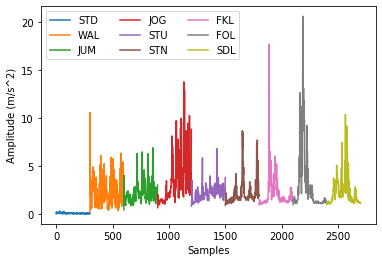

In [5]:
# Plot motions in different time
# acc = sqrt(ax^2 + ay^2 + az^2)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal

ans = 0
Standing = dt[['STD','Unnamed: 1', 'Unnamed: 2' ]]
Walking_normal = dt[['WAL', 'Unnamed: 4', 'Unnamed: 5']]
Jumping = dt[['JUM', 'Unnamed: 7', 'Unnamed: 8']] 
Jogging = dt[['JOG', 'Unnamed: 10', 'Unnamed: 11']]
Stairs_up = dt[['STU', 'Unnamed: 13', 'Unnamed: 14']] 
Stairs_down = dt[['STN', 'Unnamed: 16', 'Unnamed: 17']] 
Fall_front_knees_lying = dt[['FKL', 'Unnamed: 19', 'Unnamed: 20']]
Fall_forward_lying = dt[['FOL', 'Unnamed: 22', 'Unnamed: 23']] 
Sideward_lying = dt[['SDL', 'Unnamed: 25', 'Unnamed: 26']] 


lst = [Standing, Walking_normal,Jumping,Jogging,Stairs_up,Stairs_down, Fall_front_knees_lying, Fall_forward_lying, Sideward_lying]
x_label_samples = []

# Number of samples displayed per behavior
number_samples = 300
slot = 0
for act in lst:
    slot += 1
    arr_slot = [i for i in  range((slot-1)*number_samples, slot*number_samples)]
    x_label_samples.clear()
    x_label_samples.extend(arr_slot)
    for value in act:
        walk = dt[value]
        walk = walk.dropna()
        walk = walk.drop(0)
        walk.index = pd.RangeIndex(len(walk.index))

    # fAx after AVARAGE FILTER
        N  = 3   # Filter order
        Wn = 0.1 # Cutoff frequency
        B, A = signal.butter(N, Wn, output='ba')
        smooth_data = signal.filtfilt(B,A, walk)
     #  x = abs (walk[0:100] - np.mean(walk))
        x = abs (walk[0:number_samples] - smooth_data[0:number_samples])
        ans += pow(x,2)

    for i in range (0, len(ans)):
        ans[i] = np.sqrt(ans[i])

    plt.plot(x_label_samples, ans)
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (m/s^2)")
    plt.legend(["STD","WAL","JUM","JOG","STU","STN","FKL", "FOL", "SDL"], ncol = 3)

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

C:\Users\dell\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

C:\Users\dell\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 1.0, 'Using average filter')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

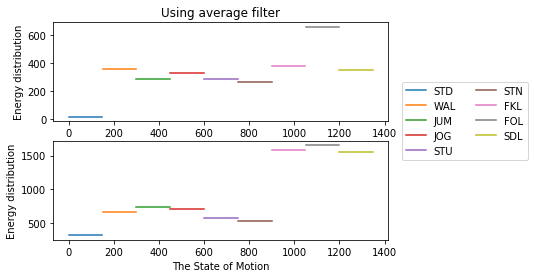

In [6]:
# Plot motions in different time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal

ans = 0
Standing = dt[['STD','Unnamed: 1', 'Unnamed: 2' ]]
Walking_normal = dt[['WAL', 'Unnamed: 4', 'Unnamed: 5']]
Jumping = dt[['JUM', 'Unnamed: 7', 'Unnamed: 8']] 
Jogging = dt[['JOG', 'Unnamed: 10', 'Unnamed: 11']]
Stairs_up = dt[['STU', 'Unnamed: 13', 'Unnamed: 14']] 
Stairs_down = dt[['STN', 'Unnamed: 16', 'Unnamed: 17']] 
Fall_front_knees_lying = dt[['FKL', 'Unnamed: 19', 'Unnamed: 20']]
Fall_forward_lying = dt[['FOL', 'Unnamed: 22', 'Unnamed: 23']] 
Sideward_lying = dt[['SDL', 'Unnamed: 25', 'Unnamed: 26']] 


lst = [Standing, Walking_normal,Jumping,Jogging,Stairs_up,Stairs_down, Fall_front_knees_lying, Fall_forward_lying, Sideward_lying]

# Number of samples displayed per behavior
number_samples = 150
slot = 0

for act in lst:
    x_label_samples = []
    slot += 1
    arr_slot = [i for i in  range((slot-1)*number_samples, slot*number_samples)]
    x_label_samples.extend(arr_slot)
    for value in act:
        walk = dt[value]
        walk = walk.dropna()
        walk = walk.drop(0)
        walk.index = pd.RangeIndex(len(walk.index))

    # fAx after AVARAGE FILTER
        N  = 3   # Filter order
        Wn = 0.1 # Cutoff frequency
        B, A = signal.butter(N, Wn, output='ba')
        smooth_data = signal.filtfilt(B,A, walk)
        x_mean = abs (walk[0:number_samples] - np.mean(walk))
        x_filter = abs (walk[0:number_samples] - smooth_data[0:number_samples])
        ans += pow(x_filter,2)
        ans1 += pow(x_mean,2)

#Convert sum_arr to have amount = X_Label_samples in order to plot
    summ = 0
    summm = 0
    for i in range (0, len(ans)):
        ans[i] = np.sqrt(ans[i])
        summ += ans[i]
        ans1[i] = np.sqrt(ans1[i])
        summm += ans1[i]
    sum_arr = []
    summ_arr = []
    for j in range(0,number_samples):
        sum_arr.append(summ)
        summ_arr.append(summm)
        
    plt.subplot(211)    
    plt.plot(x_label_samples, sum_arr)
    plt.xlabel("The State of Motion")
    plt.ylabel("Energy distribution")
 #   plt.legend(['STD', 'WAL','JUM','JOG','STU','STN','FKL','FOL','SDL'],loc='best',shadow = False, ncol=5)
    plt.title('Using average filter')
    
    plt.subplot(212)    
    plt.plot(x_label_samples, summ_arr)
    plt.xlabel("The State of Motion")
    plt.ylabel("Energy distribution")
    plt.legend(['STD', 'WAL','JUM','JOG','STU','STN','FKL','FOL','SDL'],loc='best',bbox_to_anchor=(1.025, 1.65),shadow = False, ncol = 2)
    #plt.legend(['STU','STN'],loc='upper center', bbox_to_anchor=(0.75, -0.15), frameon=False #frame, ncol #numberOfColumn)
    